In [3]:
#installing yfinance library
!pip install yfinance

In [5]:
import yfinance as yf

In [7]:
#Selecting stock APPLE 
ticker="AAPL"
#Downloading data from 2018 to 2024
data=yf.download(ticker,start="2018-01-01",end="2024-01-01")

[*********************100%***********************]  1 of 1 completed


In [8]:
#Printing first 5 rows of dataset
print(data.head())

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.341881  40.351250  39.639305  39.850080  102223600
2018-01-03  40.334858  40.878185  40.271629  40.405116  118071600
2018-01-04  40.522217  40.625262  40.299735  40.407462   89738400
2018-01-05  40.983566  41.070216  40.526893  40.618228   94640000
2018-01-08  40.831356  41.126437  40.732992  40.831356   82271200


In [10]:
#Downloading data into csv file
data.to_csv("AAPL_stock_data.csv")

In [15]:
#Input features are open,high,low and volume
#Output feature is next closing price

X = data[['High', 'Low' , 'Open', 'Volume']]
y = data['Close'].shift(-1) #we do shift(-1) because our target is the closing price of nexxt day




In [16]:
from sklearn.model_selection import train_test_split

# Drop the last row with NaN in y
X = X[:-1]
y = y[:-1]

In [17]:
#Test, train and split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [18]:
#Importing Liear Regression model
from sklearn.linear_model import LinearRegression


In [20]:
# Create model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


In [22]:
# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#mae tells us the average error that model predicts---lower mae=better model
mae = mean_absolute_error(y_test, y_pred)

#mse squares the mean average and also highlights the outliers
mse = mean_squared_error(y_test, y_pred)

#How better the model explains the data
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)  # Average error ----> 1.6 (good model)
print("Mean Squared Error (MSE):", mse)  #  5.74 --->Large errors are rare
print("R2 Score:", r2)                  #  0.997 model almost perfect fits


Mean Absolute Error (MAE): 1.6553642247724245
Mean Squared Error (MSE): 5.741520761331286
R2 Score: 0.9978206619772656


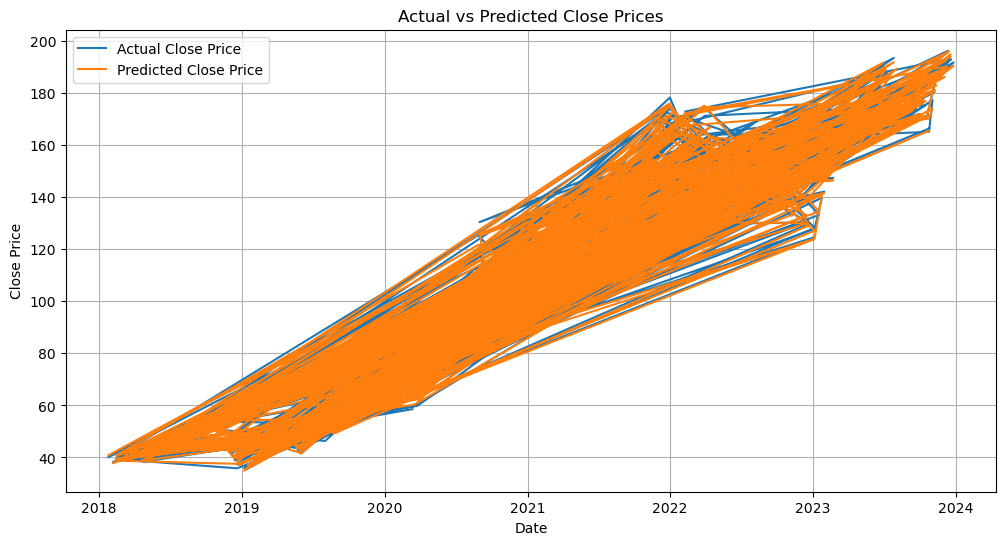

In [23]:
import matplotlib.pyplot as plt


#Plotting actual versus predicted closing prices for comparison
# X-axis is for time axis
# Y-axix is for closing prices
# Blue line shows actual closing price
# Orange line shows predicted closing price

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price')
plt.plot(y_test.index, y_pred, label='Predicted Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


#########  Results and Conclusions ##############
#As the predicted lines closly follows actual lines so model is doing very well
# So we can conclude that our linear regression model work best on this data

